#Clasificador basado en SVM con glosario personalizado




##1-Montamos y cargamos los datos

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

df_train = pd.read_csv('/content/drive/MyDrive/Ignieria_Linguistica/entrenamiento.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Ignieria_Linguistica/test.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#2-Obtención de glosario

**2.1-Extraemos las palabras más relevantes convirtiendo la colección de documentos en una matriz de características TF-IDF.**

Supongamos N=Número de documentos, T=apariciones de un termino en un documento, df=Número de apariciones de un término (t) en todos los documentos, NTD= Número de términos de un documento. Entonces:
1.   TF(Term Frequency): Número de apariciones de un término en un determinado documento. $tf(t)=\frac{t}{NTD}$
2.   IDF(Inverse Document Frequency): Numero de apariciones de un término sobre el total de documentos. $idf(t)=log_{10}[\frac{1+N}{1+df(t)}]+1$
3. TF-IDF: Permite conocer la relevancia de una palabra clave en un documento. $tf-idf(t,d) = tf(t,d) · idf(t)$

Debido al preprocesado del notebook **Transformacion_inicial.ipynb** sabemos que df_train tiene 45 documentos de cada tipo de manera ordenada, es decir, los [0-44] pertenecen a salud, [45-89] pertenecen a política y [90:134] pertenecen a deportes. El primer paso para obtener el glosario será crear una matriz TFIDF por temática.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_salud    = TfidfVectorizer()
tfidf_deportes = TfidfVectorizer()
tfidf_politica = TfidfVectorizer()

df_salud    = df_train.iloc[:45, 0]
df_politica = df_train.iloc[45:90, 0]
df_deportes = df_train.iloc[90:, 0]

tfidf_salud_train    = tfidf_salud.fit_transform(df_salud)
tfidf_politica_train = tfidf_politica.fit_transform(df_politica)
tfidf_deportes_train = tfidf_deportes.fit_transform(df_deportes)
print(tfidf_salud_train.shape, tfidf_deportes_train.shape, tfidf_politica_train.shape)

(45, 5456) (45, 6852) (45, 6678)


**2.2-Creación de glosario según temática**: Obtenemos los 100 términos más importantes según la métrica TFIDF para cada temática

In [ ]:
def obtener_glosario(tfidf, tfidf_train, topico, nterms=100):
  """Dada una matriz tfidf se devuelven los n keywords más relevantes"""
  terms = tfidf.get_feature_names_out()

  # sum tfidf frequency of each term through documents
  sums = tfidf_train.sum(axis=0)

  # connecting term to its sums frequency
  data = []
  for col, term in enumerate(terms):
      data.append( (term, sums[0,col] ))
  
  df_ranking = pd.DataFrame(data, columns=['palabra','ranking'])
  df_ranking = df_ranking.sort_values('ranking', ascending=False)
  print("================="+topico+"=================")
  print(df_ranking[:10])
  df_ranking.drop('ranking', inplace=True, axis=1)
  df_ranking = df_ranking.iloc[:nterms]
  return df_ranking


glosario_salud    = obtener_glosario(tfidf_salud, tfidf_salud_train, "SALUD")
glosario_politica = obtener_glosario(tfidf_politica, tfidf_politica_train, "POLITICA")
glosario_deportes = obtener_glosario(tfidf_deportes, tfidf_deportes_train, "DEPORTES")

=================SALUD=================
          palabra   ranking
4633        salud  1.436722
5332         vida  1.277392
4760           si  1.175304
4203        puede  1.147999
3670    pacientes  1.129328
3824     personas  1.065938
4738          ser  1.044038
5136  tratamiento  1.020511
4204       pueden  0.946392
2457        gripe  0.934924
=================POLITICA=================
         palabra   ranking
714         años  1.393596
4855    política  1.304164
4911          pp  1.243645
3066    gobierno  1.232390
6336    tribunal  1.213392
4829     podemos  1.103156
4987  presidente  1.102825
6127     sánchez  1.063895
2525      españa  1.059743
2226         efe  1.029939
=================DEPORTES=================
        palabra   ranking
3907     madrid  1.350337
4279    mundial  1.272425
2467     equipo  1.253648
2537     españa  1.182940
4653    partido  1.155746
5364       real  1.141463
3693     laliga  1.072634
667        años  1.062380
3614    jugador  1.060628
5900  sel

**2.3-Volcamos los glosarios a un excel para realizar una revisión manual** de cada uno de los glosarios.

A continuación se muestra una lista de las palabras eliminadas según temática:


1.   Salud: si, ser, puede, pueden, cada, mejor, bien, según, hacer, manera, día, hoy, tambin, días, así, hace, solo, dos, siempre, ejemplo, incluso, mismo, muchas. :23
2.   Política: dos, ahora, hace, ser, tras, siempre, sido, pasado, meses, solo, bien, según, aunque, mismo, año. :15
3.   Deportes: dos, tres, si, sido, ser, tras, después, solo, ahora, así, hace, siempre, tan, aunque. :14


In [ ]:
glosario_salud.to_excel('/content/drive/MyDrive/Ignieria_Linguistica/glosarios/salud.xlsx', index=False)
glosario_politica.to_excel('/content/drive/MyDrive/Ignieria_Linguistica/glosarios/politica.xlsx', index=False)
glosario_deportes.to_excel('/content/drive/MyDrive/Ignieria_Linguistica/glosarios/deportes.xlsx', index=False)

2.3.1-Cargamos los excel revisados manualmente a un dataframe, le añadimos la clase a la que pertenece y vemos el número de palabras por glosario resultante

In [13]:
glosario_salud    = pd.read_excel('/content/drive/MyDrive/Ignieria_Linguistica/glosarios/salud_revisado.xlsx')
glosario_politica = pd.read_excel('/content/drive/MyDrive/Ignieria_Linguistica/glosarios/politica_revisado.xlsx')
glosario_deportes = pd.read_excel('/content/drive/MyDrive/Ignieria_Linguistica/glosarios/deportes_revisado.xlsx')

glosario_salud['clase']    = 0
glosario_politica['clase'] = 1
glosario_deportes['clase'] = 2

print(glosario_salud.shape, glosario_politica.shape, glosario_deportes.shape)

(78, 2) (86, 2) (87, 2)


**2.5-Obtención de glosario global:Hacemos la intersección simétrica entre los glosraios revisados**, ya que nos interesan las palabras más diferentes posibles, y si son comunes a dos tópicos preferimos no tenerlas. Para ello primeramente los unimos y luego eliminamos los elementos duplicados.

En este caso, al hacer esta operación hemos pasado de tener un glosario de 251 palabras (87+86+78) a uno de 212, es decir, existían 39 palabras que ser repetían en al menos dos temáticas.

Una vez hecha esta operación, lo volcamos sobre un csv, ya que utilizaremos este mismo glosario para otras aproximaciones.

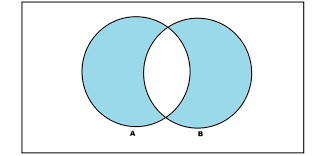

In [14]:
glosarios = [glosario_salud, glosario_politica, glosario_deportes]

glosario = pd.concat(glosarios)
glosario = glosario.drop_duplicates(subset='palabra', keep=False)
glosario.reset_index(drop=True, inplace=True)
glosario.to_csv('/content/drive/MyDrive/Ignieria_Linguistica/glosario.csv', index=False)
print('Salud:', len(glosario[(glosario['clase'])==0]), '| Politica:', len(glosario[(glosario['clase'])==1]), '| Deportes:', len(glosario[(glosario['clase'])==2]))
glosario

Salud: 71 | Politica: 71 | Deportes: 70


,palabra,clase
0,salud,0
1,vida,0
2,pacientes,0
3,personas,0
4,tratamiento,0
...,...,...
207,wolff,2
208,marc,2
209,galahad,2
210,británico,2


#**3-Creación de una matriz TFIDF a partir del glosario global.**


**3.1-Obtenemos el tfidf global de todos los documentos a partir de los cuales hemos obtenido nuestros 3 glosarios. df_train**

In [15]:
tfidf_global = TfidfVectorizer()
tfidf_global_train = tfidf_global.fit_transform(df_train.iloc[:,0])

#Transformamos el texto del conjunto de test a TFIDF
x_test = tfidf_global.transform(df_test.iloc[:,0])

3.1.1-Obtenemos los índices de las palabras de nuestro glosario

In [16]:
vocabulario_glosario = glosario['palabra'].tolist()
indices_palabras_glosario = [tfidf_global.vocabulary_[key] for key in vocabulario_glosario]

3.2.2-Obtenemos los valores tfidf asociados a cada palabra de nuestro vocabulario para cada uno de los documentos.

In [17]:
x_train = tfidf_global_train[:, indices_palabras_glosario]
x_train = x_train.todense()

x_test = x_test[:, indices_palabras_glosario]
x_test = x_test.todense()

**3.3-Creacion de datos de entrenamiento y test (X)**

3.3.1-Creacion DF con vocabulario glosario y el tfidf asociado (ENTRADA DEL MODELO)

In [20]:
df_x_train = pd.DataFrame(x_train)
df_x_train.columns=vocabulario_glosario
df_x_train

,salud,vida,pacientes,personas,tratamiento,gripe,cuerpo,ms,piel,hospital,importante,tabaco,ejercicio,riesgo,tipo,dosis,asegura,forma,correr,doctora,alimentos,enfermedades,explica,vacunación,diabetes,evitar,arginina,queratitis,debe,fructosa,consumo,enfermedad,tratamientos,agua,casos,uso,bata,paciente,dolor,zapatos,...,historia,último,sevilla,odegaard,rossi,mercedes,gales,valentino,tenista,ancelotti,pilotos,ciudad,juego,jugar,martínez,hamilton,deportiva,pista,vez,fútbol,wta,balón,noche,piloto,domingo,horner,fin,mientras,segundo,hoy,italia,smartbank,deporte,remy,clasificación,wolff,marc,galahad,británico,grupo
0,0.021774,0.019725,0.000000,0.037714,0.000000,0.0,0.220167,0.0,0.000000,0.000000,0.000000,0.00000,0.053397,0.000000,0.000000,0.000000,0.000000,0.017174,0.00000,0.0,0.058048,0.000000,0.021774,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.021774,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.016209,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.020438
1,0.017686,0.000000,0.000000,0.045950,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.015486,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.073713,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.624869,0.046107,0.0,0.0,...,0.000000,0.017015,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.017925,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0.082838,0.000000,0.000000,0.023913,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.13084,0.000000,0.090198,0.000000,0.000000,0.026237,0.021779,0.00000,0.0,0.000000,0.000000,0.027613,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.035992,0.000000,0.000000,0.000000,0.000000,0.063069,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.025918
3,0.036319,0.032901,0.000000,0.015727,0.021091,0.0,0.142816,0.0,0.026865,0.000000,0.047703,0.00000,0.022267,0.000000,0.000000,0.000000,0.017255,0.014323,0.00000,0.0,0.072619,0.023670,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.018921,0.0,0.000000,0.000000,0.000000,0.482871,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.013519,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051764,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.011650,0.031660,0.057138,0.010089,0.067654,0.0,0.000000,0.0,0.017235,0.013304,0.010201,0.00000,0.014285,0.050740,0.147557,0.018401,0.000000,0.000000,0.00000,0.0,0.093174,0.045556,0.000000,0.0,0.51612,0.045991,0.0,0.0,0.036416,0.0,0.015185,0.059461,0.068939,0.000000,0.058249,0.039913,0.000000,0.030370,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.008673,0.000000,0.0,0.000000,0.000000,0.000000,0.014285,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.010935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13

3.3.2-Creación de etiquetas asociadas a la entrada del modelo (SALIDA DEL MODELO)

In [ ]:
df_y = df_train.iloc[:,1]

## **4-Creamos un clasificador SVM (Support Vector Machine)**.
Este clasificador tratará de trazar líneas de separación lo mejor posible para separar los diferentes puntos (puntos son cada uno de los documentos (representados por el conjunto de características extraídas)) según su clase.


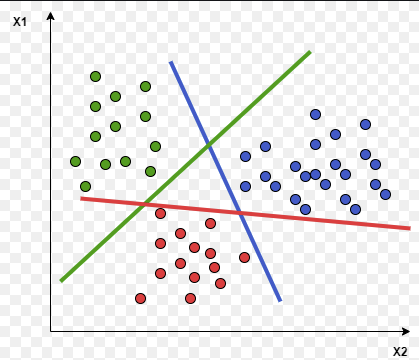

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True)

**4.1-Obtenemos una aproximación de la bondad del mismo mediante repeatedKfold.**

Con el objetivo de tener una **estimación más realista de las métricas o bondad del modelo**, y más en este caso que tratamos con pocos datos, es muy conveniente llevar a cabo una **validación cruzada**. La validación cruzada k-fold consiste en dividir el conjunto de datos en k divisiones no superpuestas. De esta manera se crean K modelos, cada uno de ellos con diferentes datos de entrenamiento y de prueba y se obtiene el resultado medio de estos modelos.
n_splits = Número de particiones para nuestro conjunto de datos.
n_repeats = Número de validaciones cruzadas a repetir.
Por tanto, no es lo mismo n_splits = 10 y n_repeats = 1 que n_splits = 5 y n_repeats = 2.
En el primer caso, estaríamos obteniendo 10 divisiones de datos, pero dicha división aleatoria se realizaría una vez. En el segundo casó se obtendrían 10 divisiones de datos nuevamente, pero esos datos se dividirían aleatoriamente 2 veces.

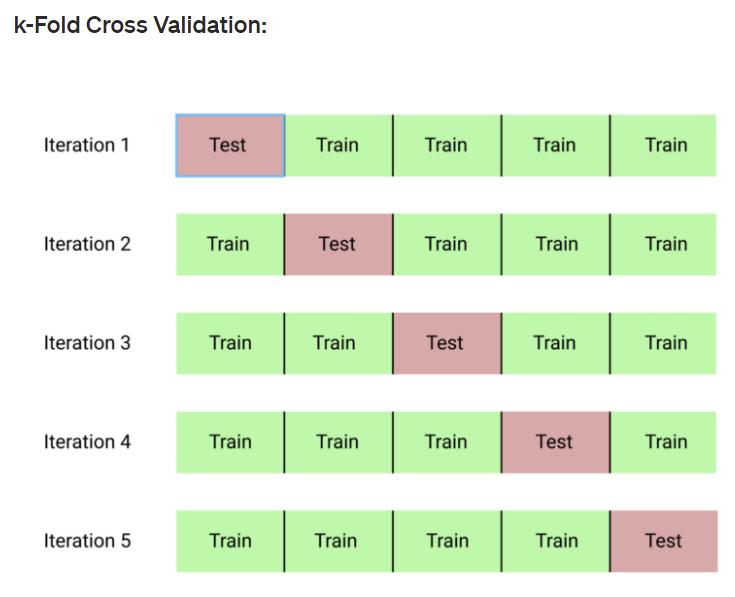

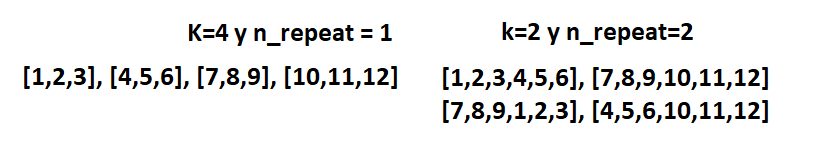

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
y_train = df_y.values
x_train = df_x.values

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
metrics = cross_validate(model, x_train, y_train, scoring=['precision_macro', 'recall_macro'], cv=cv, n_jobs=-1)

print('Precision: ', str(round((mean(metrics["test_precision_macro"])),3)), '| Desviación típica: ', str( round( std(metrics["test_precision_macro"]), 3)))

Precision:  0.91 | Desviación típica:  0.087


Como podemos observar, los resultados parecen buenos, por lo que vamos a entrenar el modelo.

#**5-Entrenamiento y evaluación del modelo**

**5.1-Entrenamiento del modelo con los datos a partir del cual hemos obtenido el glosario**

In [ ]:
clasificador = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(x_train, y_train)

**5.2-Evaluación sobre los datos de test**

5.2.1-Obtenemos las predicciones en forma probabilistica y las volcamos en un excel para incluirlo en la memoria.

In [ ]:
predicciones = clasificador.predict_proba(x_test)
predicciones_rounded = [np.round(x,3) for x in predicciones]

df_predicciones = pd.DataFrame(predicciones_rounded)
df_predicciones.columns=['Salud', 'Politica', 'Deportes']
df_predicciones.index.name = 'Documento'
df_predicciones['Clase_real'] = y_test
df_predicciones.to_excel('/content/drive/MyDrive/Ignieria_Linguistica/modelo_SVM_glosario/predicciones.xlsx')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


5.2.2-Obtenemos las predicciones sin probabilidad

In [ ]:
predicciones = clasificador.predict(x_test_glosario_propio)
predicciones

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

**5.3-Obtenemos un informe del clasificador**
Lo guardamos en un excel para incluirlo en la memoria

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Salud', 'Politica', 'Deportes']
informe = classification_report(y_test, predicciones, target_names=target_names, digits=3)
print(classification_report(y_test, predicciones, target_names=target_names, digits=3))

informe = classification_report(y_test, predicciones, target_names=target_names, digits=3, output_dict=True)
df_informe = pd.DataFrame(informe).transpose()
df_informe.to_excel('/content/drive/MyDrive/Ignieria_Linguistica/modelo_SVM_glosario/informe.xlsx', index=True)

              precision    recall  f1-score   support

       Salud      1.000     1.000     1.000        15
    Politica      1.000     0.867     0.929        15
    Deportes      0.882     1.000     0.938        15

    accuracy                          0.956        45
   macro avg      0.961     0.956     0.955        45
weighted avg      0.961     0.956     0.955        45



**5.4-Obtenemos una matriz de correlación para ver el número de bien y mal clasificados**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clasificador, x_test_glosario_propio, y_test)

NameError: ignored

Esta matriz de confusión nos muestra que:


1.   **De** los **15** documentos de **salud**, **15** han sido correctamente clasificado.
2.   **De** los **15** documentos de **política**, **13** han sido correctamente clasificado.
3.   **De** los **15** documentos de **deportes**, **15** han sido correctamente clasificado.


**Como conclusión podemos extraer que parece que los glosarios son muy buenos para salud y deportes, pero que no lo es tanto para política.**
